In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt   
%matplotlib inline
import matplotlib.style
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import metrics,model_selection
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_excel(r'C:/Users/aqua/OneDrive/Desktop/DSBA/CAPSTONE/Customer Churn Data.xlsx', sheet_name = 'Data for DSBA')

In [3]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [4]:
df.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [5]:
df.shape

(11260, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [7]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


In [9]:
df.describe(include='object').T

,count,unique,top,freq
Tenure,11158,38,1,1351
Payment,11151,5,Debit Card,4587
Gender,11152,4,Male,6328
Account_user_count,11148,7,4,4569
account_segment,11163,7,Super,4062
Marital_Status,11048,3,Married,5860
rev_per_month,11158,59,3,1746
rev_growth_yoy,11260,20,14,1524
coupon_used_for_payment,11260,20,1,4373
Day_Since_CC_connect,10903,24,3,1816


In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

AccountID                  11260
Churn                          2
Tenure                        38
City_Tier                      3
CC_Contacted_LY               44
Payment                        5
Gender                         4
Service_Score                  6
Account_user_count             7
account_segment                7
CC_Agent_Score                 5
Marital_Status                 3
rev_per_month                 59
Complain_ly                    2
rev_growth_yoy                20
coupon_used_for_payment       20
Day_Since_CC_connect          24
cashback                    5693
Login_device                   3
dtype: int64

In [12]:
# dropping unneccessary column
df = df.drop(["AccountID"], axis=1)
df.head(5)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [13]:
df['Tenure'].value_counts()

1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64

In [14]:
df['Tenure'] = df['Tenure'].replace('#', np.nan)

In [15]:
df['Payment'].value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [16]:
df['Gender'].value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [17]:
df["Gender"] = df["Gender"].replace("M", 'Male').replace("F", 'Female')

In [18]:
df['Marital_Status'].value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [19]:
df['account_segment'].value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [20]:
df["account_segment"] = df["account_segment"].replace("Regular +", 'Regular Plus').replace("Super +", 'Super Plus')

In [21]:
df['Login_device'].value_counts()

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

In [22]:
df['Login_device'] = df['Login_device'].replace('&&&&', np.nan)

In [23]:
df['rev_per_month'].value_counts()

3      1746
2      1585
5      1337
4      1218
6      1085
7       754
+       689
8       643
9       564
10      413
1       402
11      278
12      166
13       93
14       48
15       24
102       8
123       5
124       5
107       5
136       4
140       4
118       4
133       4
129       4
115       3
117       3
138       3
101       3
110       3
137       3
119       3
108       3
127       3
116       3
126       3
130       3
113       3
120       2
19        2
131       2
139       2
114       2
125       2
22        2
121       2
105       2
134       2
20        1
23        1
122       1
21        1
104       1
25        1
135       1
111       1
109       1
100       1
103       1
Name: rev_per_month, dtype: int64

In [24]:
df['rev_per_month'] = df['rev_per_month'].replace('+', np.nan)

In [25]:
df['City_Tier'].value_counts()

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

In [26]:
df['Service_Score'].value_counts()

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

In [27]:
df['Account_user_count'].value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [28]:
df['Account_user_count'] = df['Account_user_count'].replace('@', np.nan)

In [29]:
df["coupon_used_for_payment"].value_counts()

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
10      34
9       34
11      30
12      26
13      22
14      12
15       4
16       4
#        1
$        1
*        1
Name: coupon_used_for_payment, dtype: int64

In [30]:
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('#', np.nan)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('$', np.nan)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('*', np.nan)

In [31]:
df['cashback'].value_counts()

155.62    10
149.36     9
154.73     9
145.08     9
149.68     9
          ..
131.55     1
245.64     1
130.78     1
299.72     1
191.42     1
Name: cashback, Length: 5693, dtype: int64

In [32]:
df['cashback'] = df['cashback'].replace('$', np.nan)

In [33]:
df['Day_Since_CC_connect'].value_counts()

3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
30       2
31       2
47       2
$        1
46       1
Name: Day_Since_CC_connect, dtype: int64

In [34]:
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace('$', np.nan)

In [35]:
df['rev_growth_yoy'].value_counts()

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
$        3
4        3
Name: rev_growth_yoy, dtype: int64

In [36]:
df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$', np.nan)

In [37]:
df.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

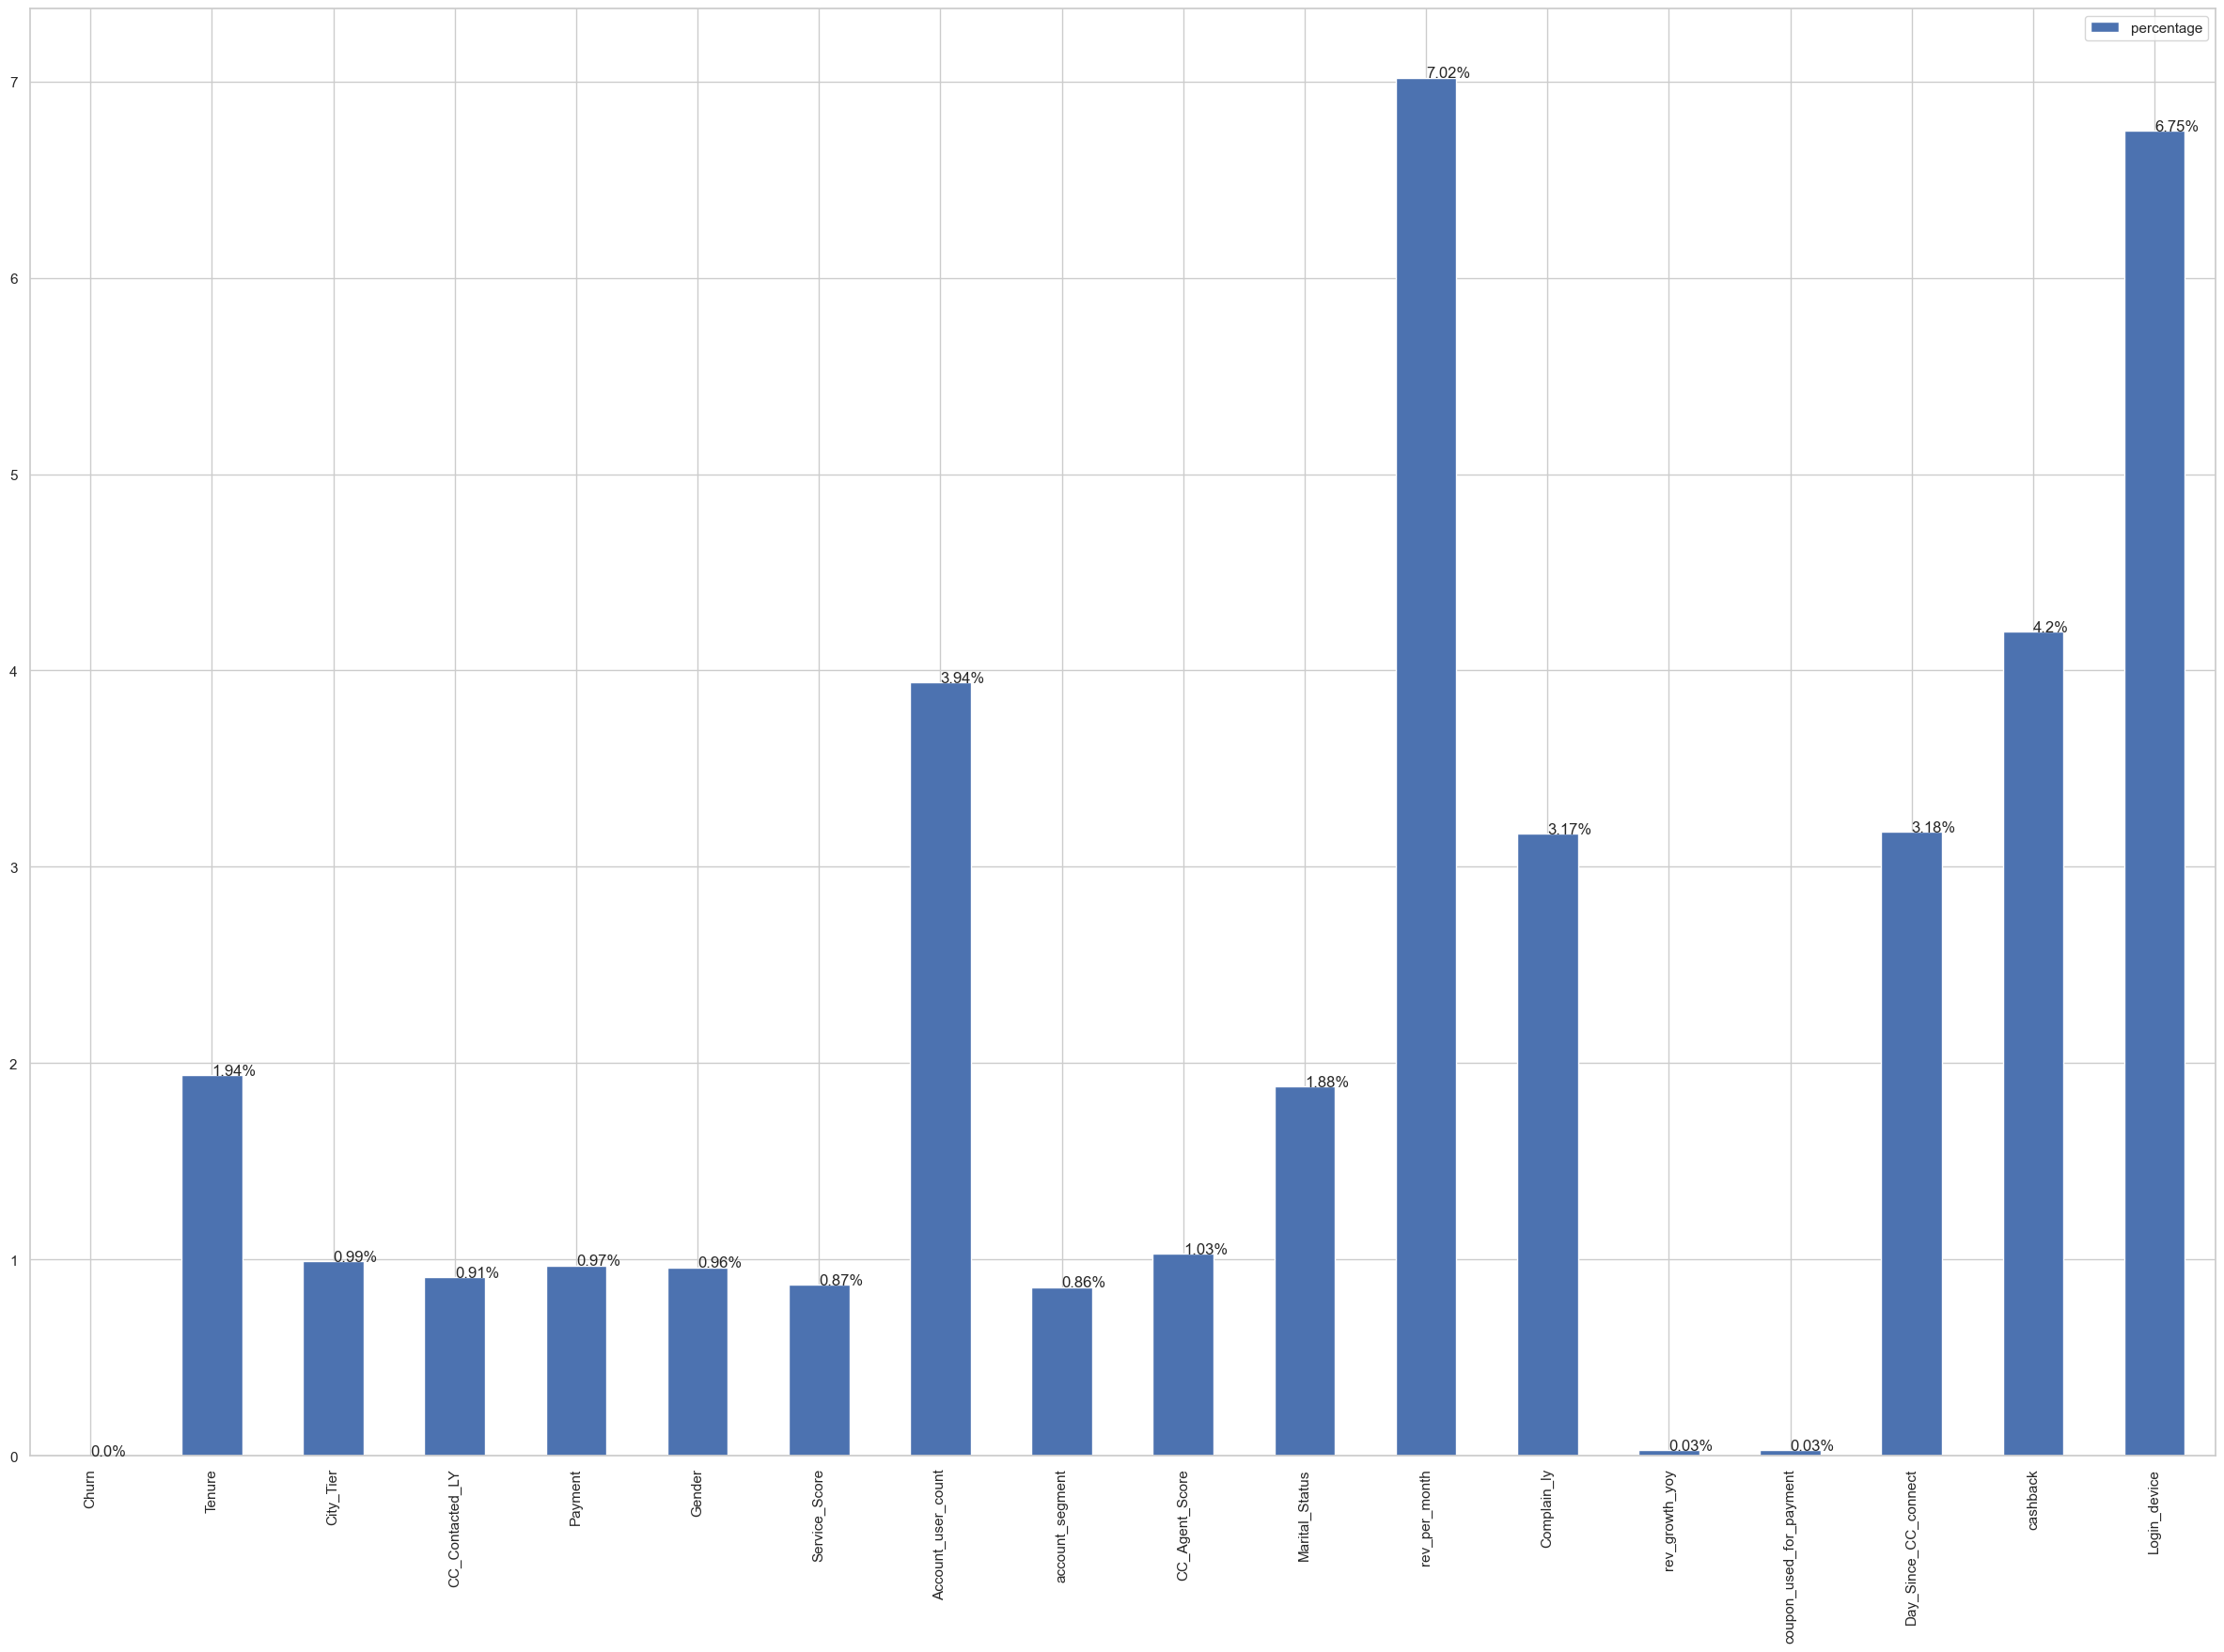

In [38]:
# the count of missing value
missing_count_df = df.isnull().sum()

# the count of all values
value_count_df = df.isnull().count()

# the percentage of missing values
missing_percentage_df = round(missing_count_df/value_count_df*100,2)

# create a dataframe
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df })

barchart = missing_df.plot.bar(y='percentage',rot=90,figsize=(30,20))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

In [39]:
print('Percentage of Total Missing Values in the data =' ,(df.isna().sum().sum()*100/df.size).round(2), "%")

Percentage of Total Missing Values in the data = 2.15 %


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [41]:
df.describe(include='object').T

,count,unique,top,freq
Payment,11151,5,Debit Card,4587
Gender,11152,2,Male,6704
account_segment,11163,5,Regular Plus,4124
Marital_Status,11048,3,Married,5860
Login_device,10500,2,Mobile,7482


In [42]:
df.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

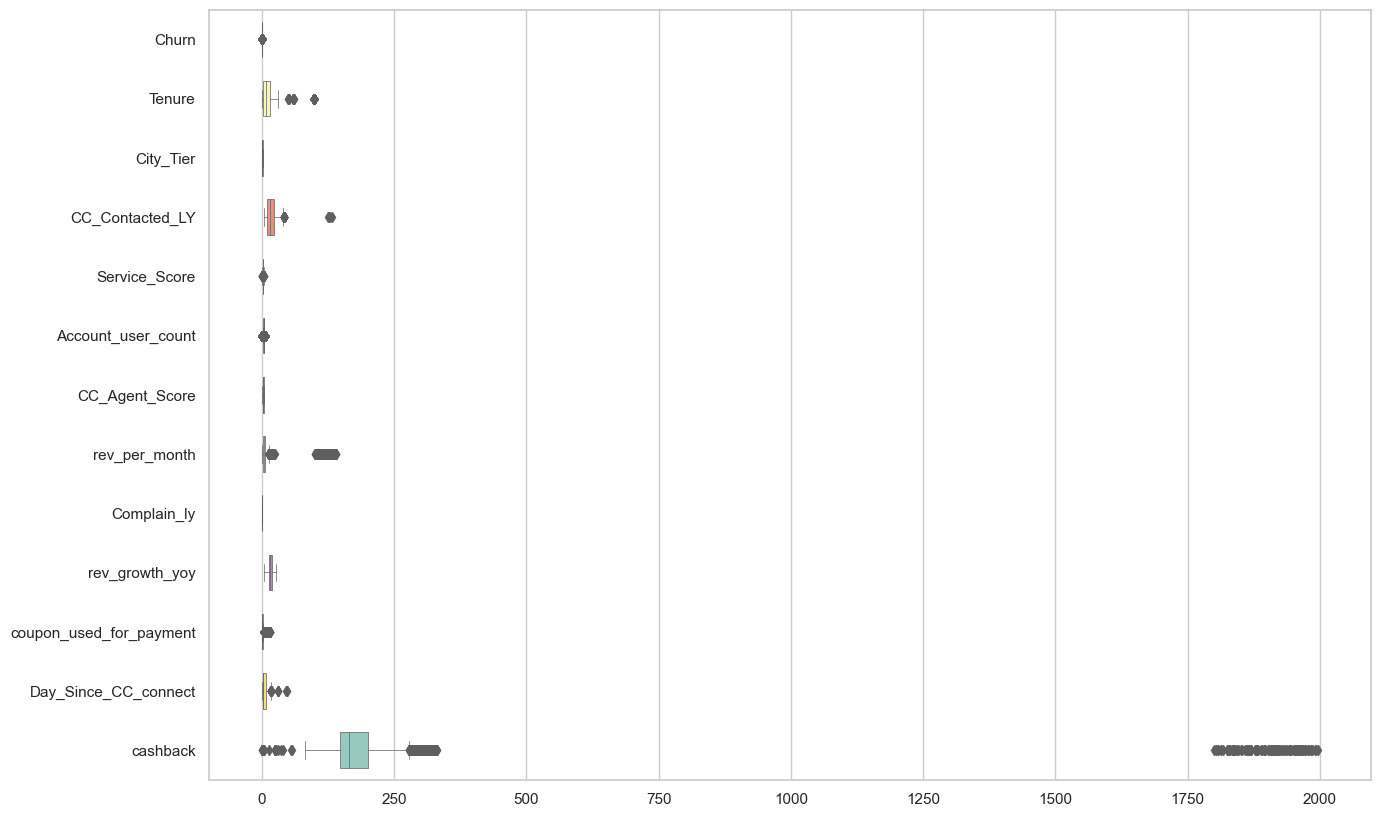

In [43]:
#checking outliers
f, ax = plt.subplots(figsize=(15,10))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='h',linewidth=0.5)

In [44]:
#Treatment of outliers
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [45]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
lstnumericcolumns

['Churn',
 'Tenure',
 'City_Tier',
 'CC_Contacted_LY',
 'Service_Score',
 'Account_user_count',
 'CC_Agent_Score',
 'rev_per_month',
 'Complain_ly',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback']

In [46]:
for feature in df[['Tenure','City_Tier','CC_Contacted_LY','Service_Score','Account_user_count','CC_Agent_Score',
                   'rev_per_month','Complain_ly','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']]:
    lr,ur=remove_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

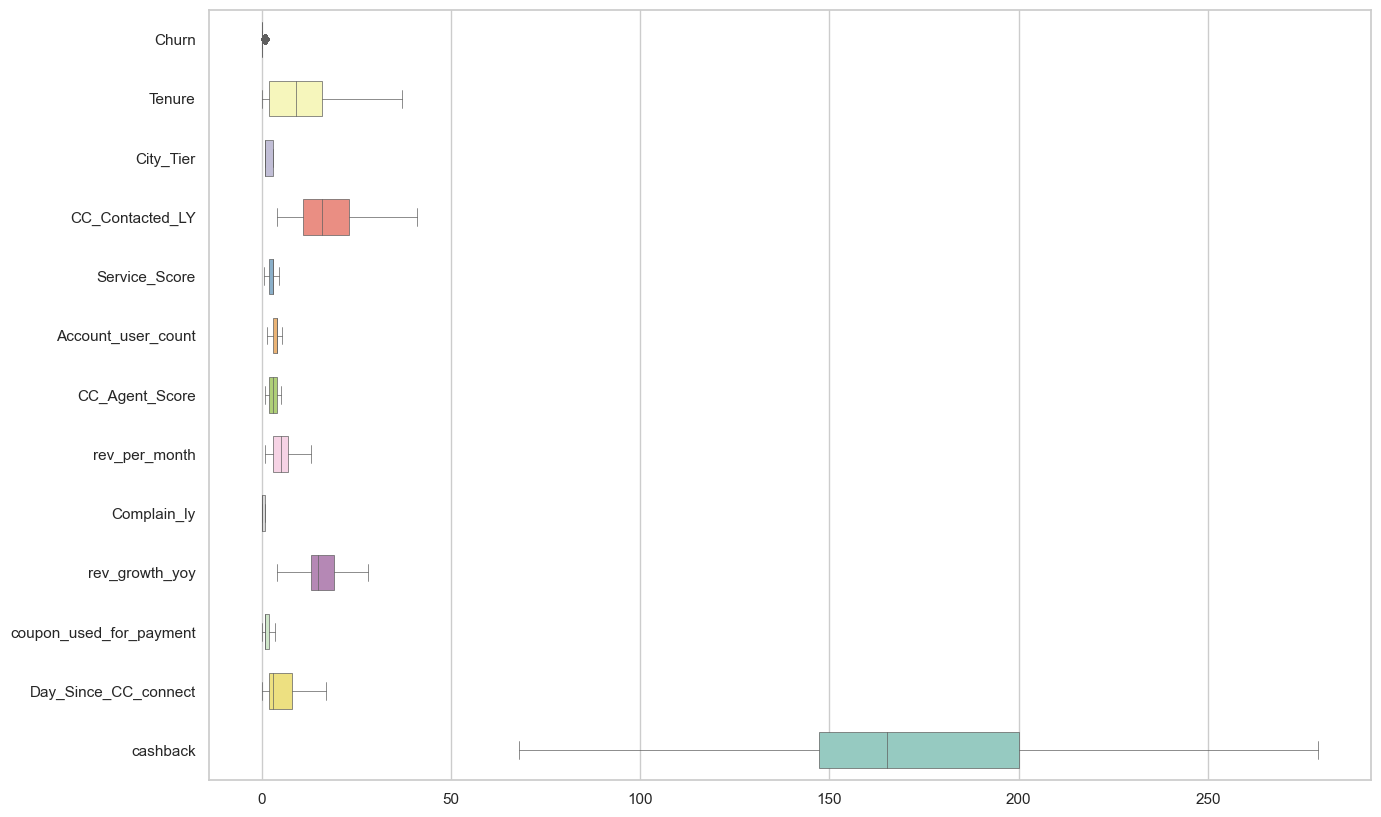

In [47]:
#checking outliers after treating them
f, ax = plt.subplots(figsize=(15,10))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='h',linewidth=0.5)

In [48]:
df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,...,Payment_E wallet,Payment_UPI,Gender_Male,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,...,0,0,0,0,0,1,0,0,1,1
1,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,...,0,1,1,0,1,0,0,0,1,1
2,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,...,0,0,1,0,1,0,0,0,1,1
3,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,...,0,0,1,0,0,1,0,0,1,1
4,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,...,0,0,1,0,1,0,0,0,1,1


In [49]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=50)

In [50]:
df = pd.DataFrame(imputer.fit_transform(df_dummy), columns = df_dummy.columns)

In [51]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,...,Payment_E wallet,Payment_UPI,Gender_Male,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1.0,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [52]:
df.isnull().sum()

Churn                           0
Tenure                          0
City_Tier                       0
CC_Contacted_LY                 0
Service_Score                   0
Account_user_count              0
CC_Agent_Score                  0
rev_per_month                   0
Complain_ly                     0
rev_growth_yoy                  0
coupon_used_for_payment         0
Day_Since_CC_connect            0
cashback                        0
Payment_Credit Card             0
Payment_Debit Card              0
Payment_E wallet                0
Payment_UPI                     0
Gender_Male                     0
account_segment_Regular         0
account_segment_Regular Plus    0
account_segment_Super           0
account_segment_Super Plus      0
Marital_Status_Married          0
Marital_Status_Single           0
Login_device_Mobile             0
dtype: int64

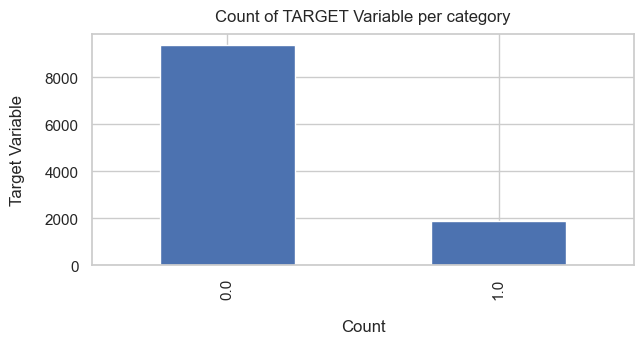

In [53]:
df['Churn'].value_counts().plot(kind='bar',figsize=(7,3))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [54]:
100*df['Churn'].value_counts()/len(df['Churn'])

0.0    83.161634
1.0    16.838366
Name: Churn, dtype: float64

In [55]:
df['Churn'].value_counts()

0.0    9364
1.0    1896
Name: Churn, dtype: int64

In [56]:
### data is highly imbalanced as ratio is 83:17 approximately

<AxesSubplot:xlabel='Tenure', ylabel='Count'>

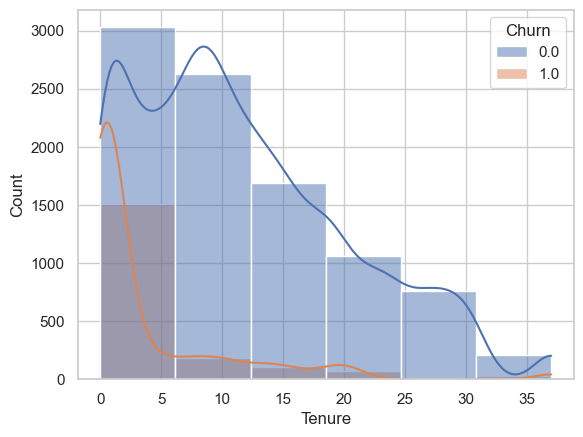

In [57]:
sns.histplot(data=df, x="Tenure", hue="Churn", bins = 6, kde = True)

<AxesSubplot:xlabel='cashback', ylabel='Count'>

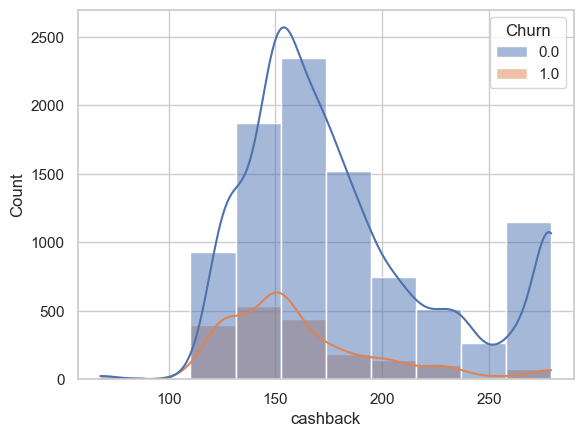

In [58]:
sns.histplot(data=df, x="cashback", hue="Churn", bins = 10, kde = True)

<AxesSubplot:xlabel='CC_Contacted_LY', ylabel='Count'>

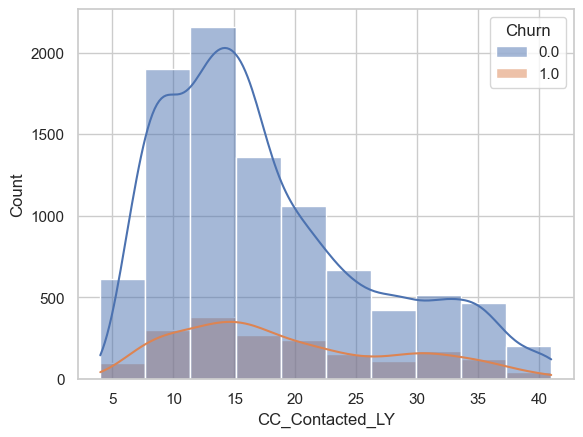

In [59]:
sns.histplot(data=df, x="CC_Contacted_LY", hue="Churn", bins = 10, kde = True)

<Figure size 640x480 with 0 Axes>

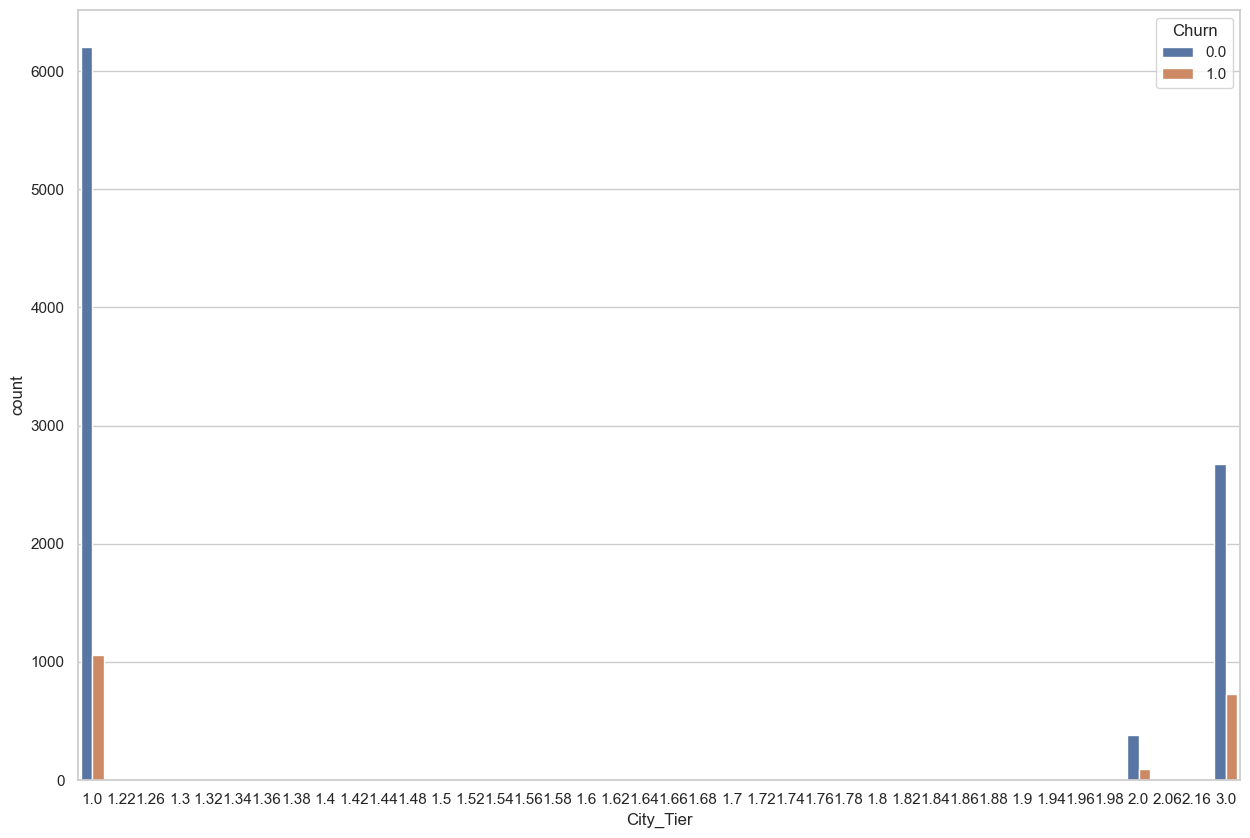

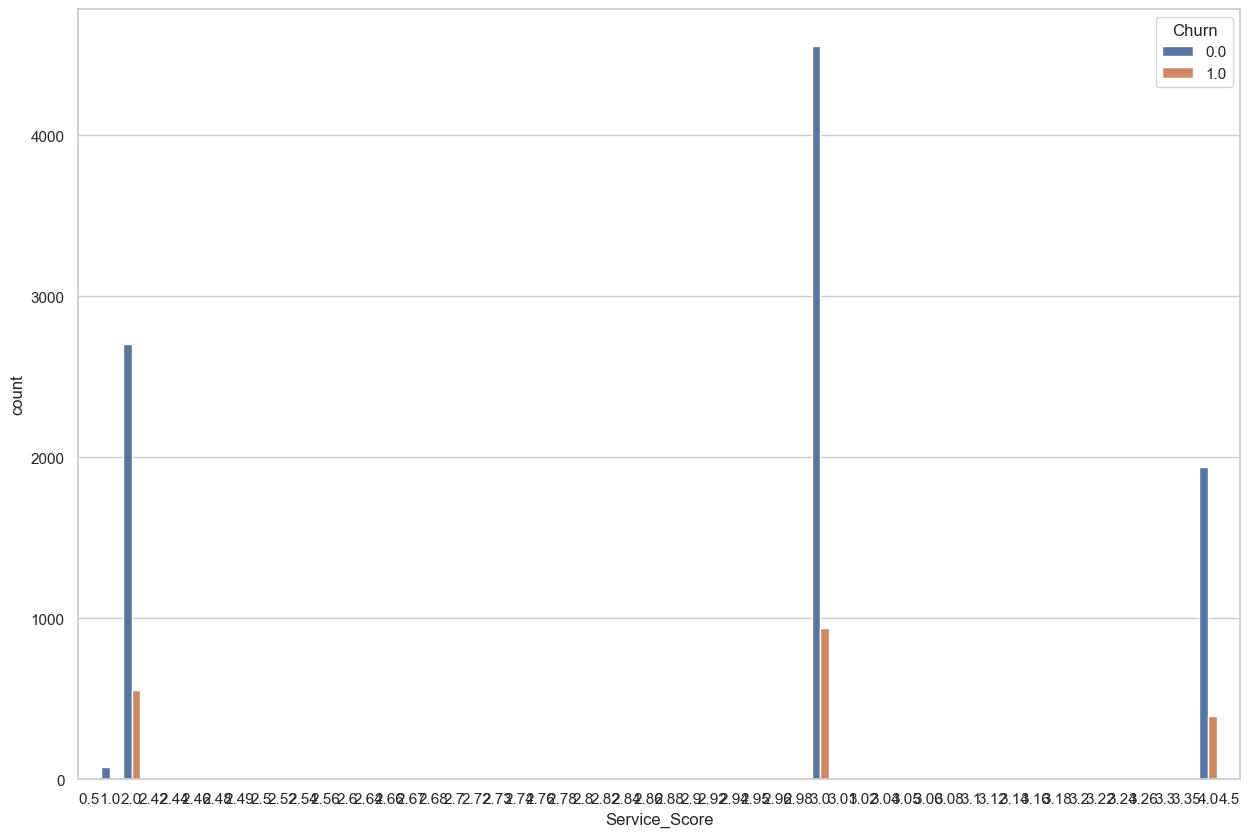

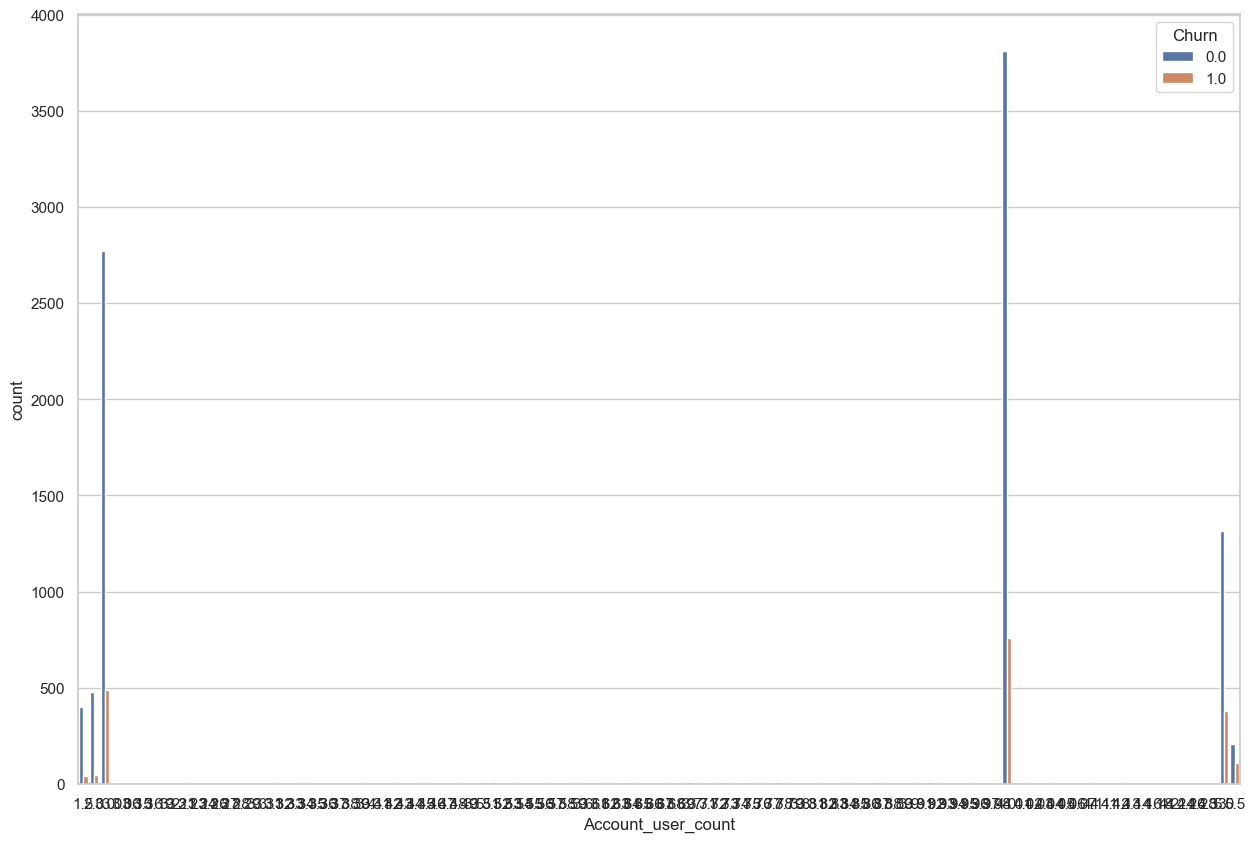

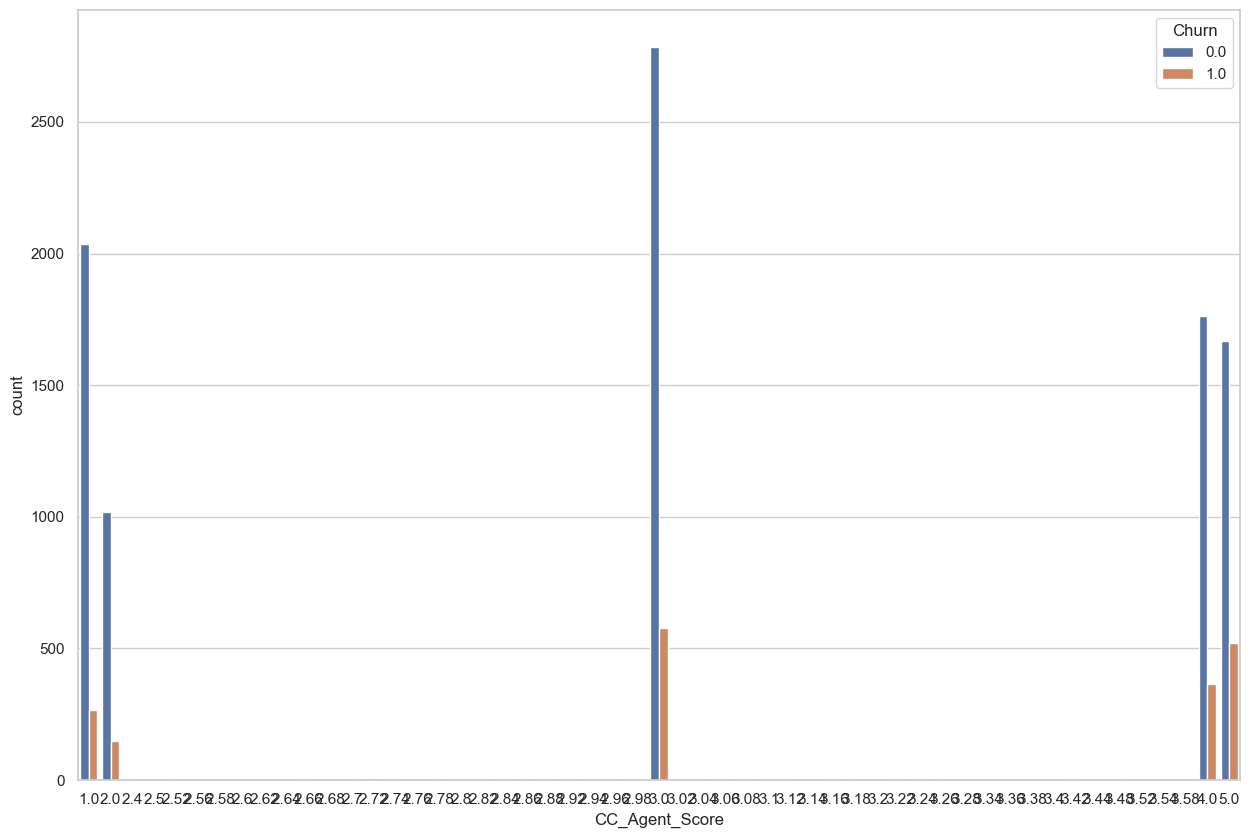

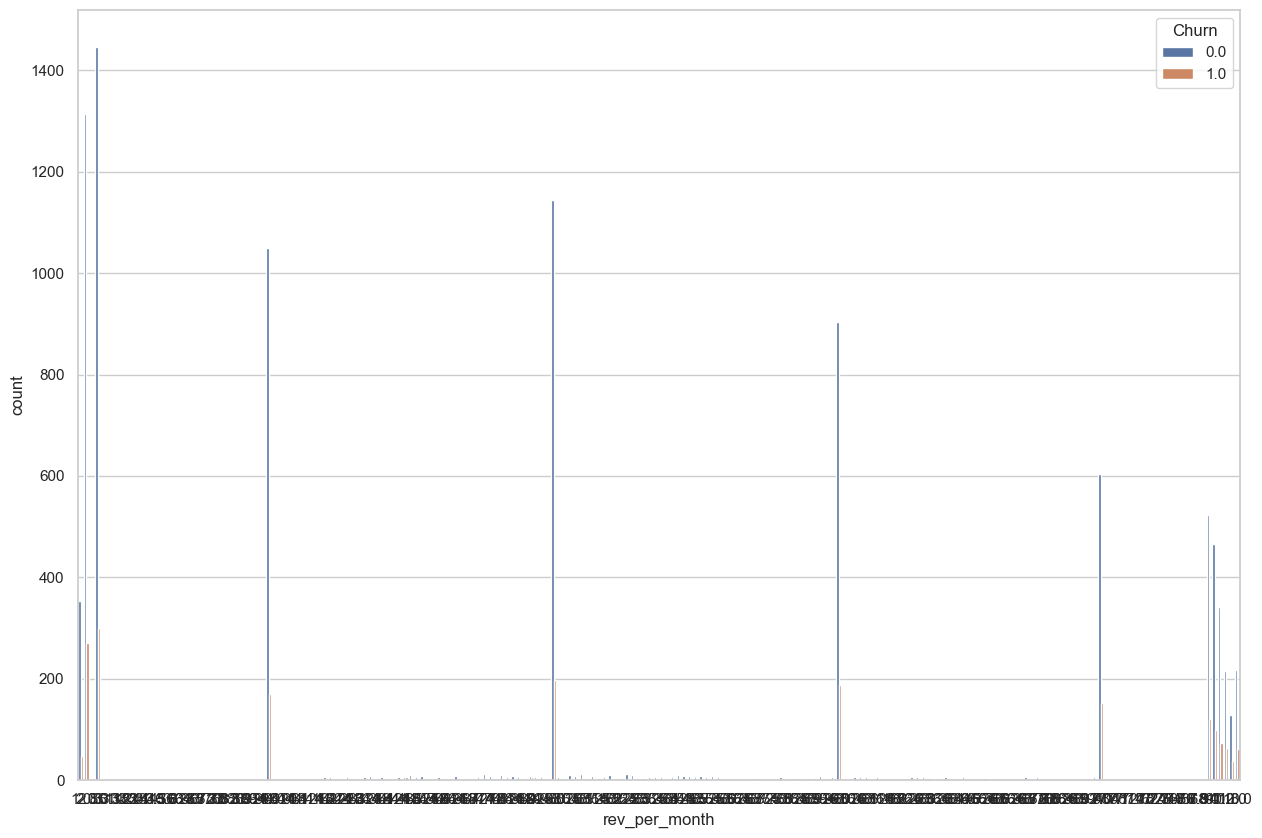

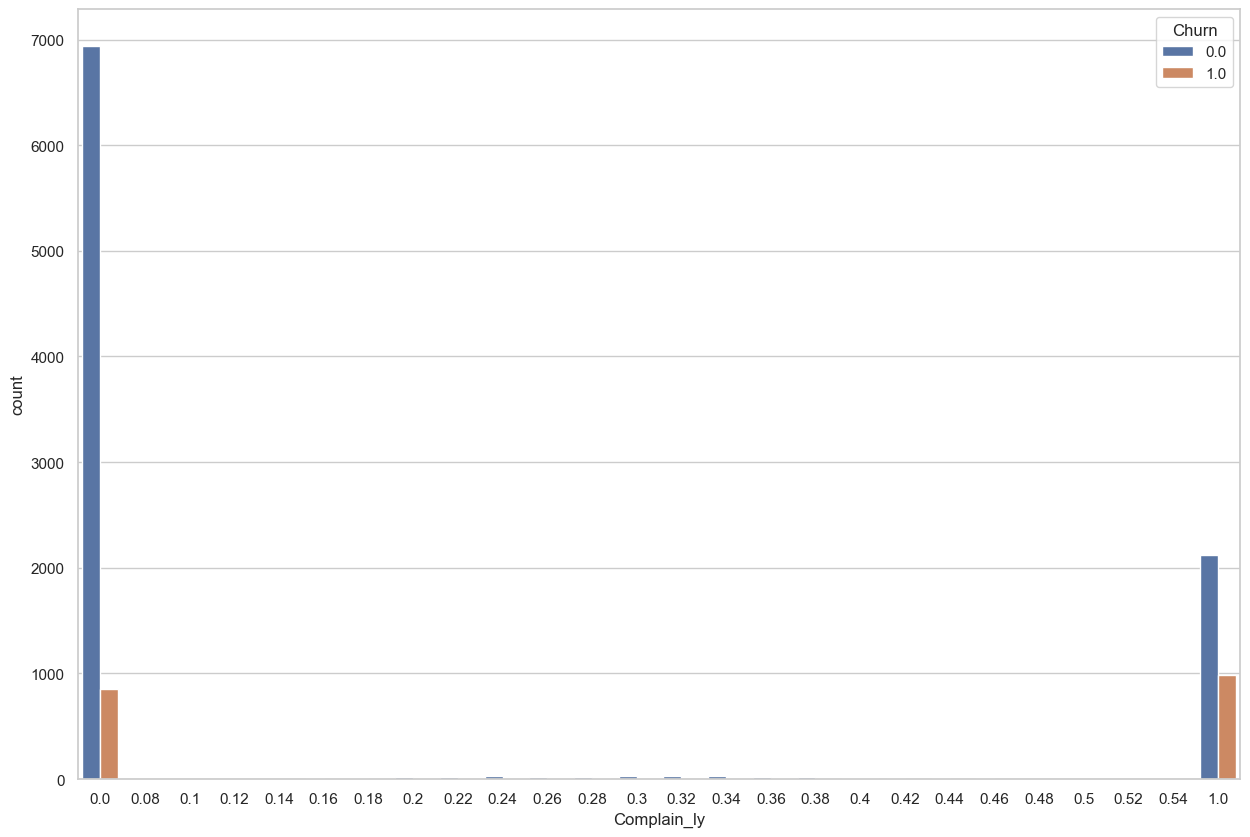

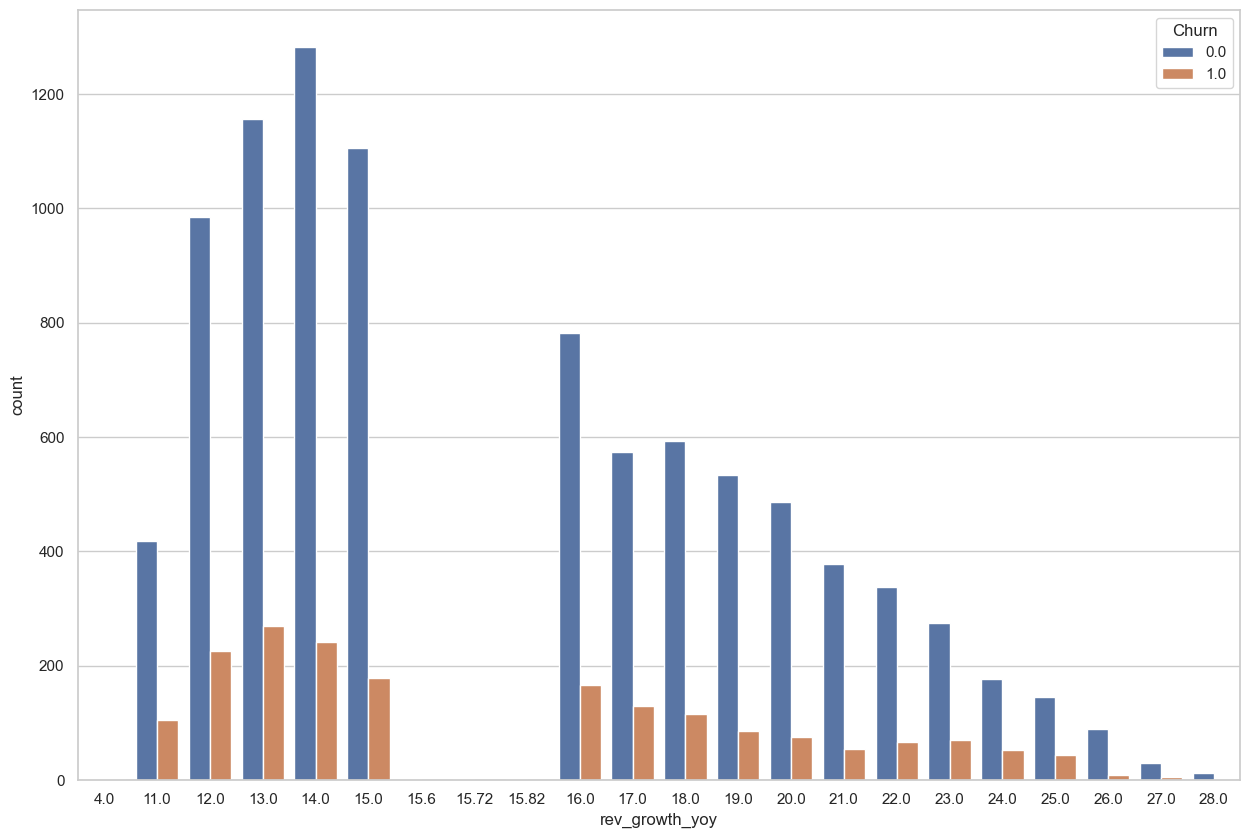

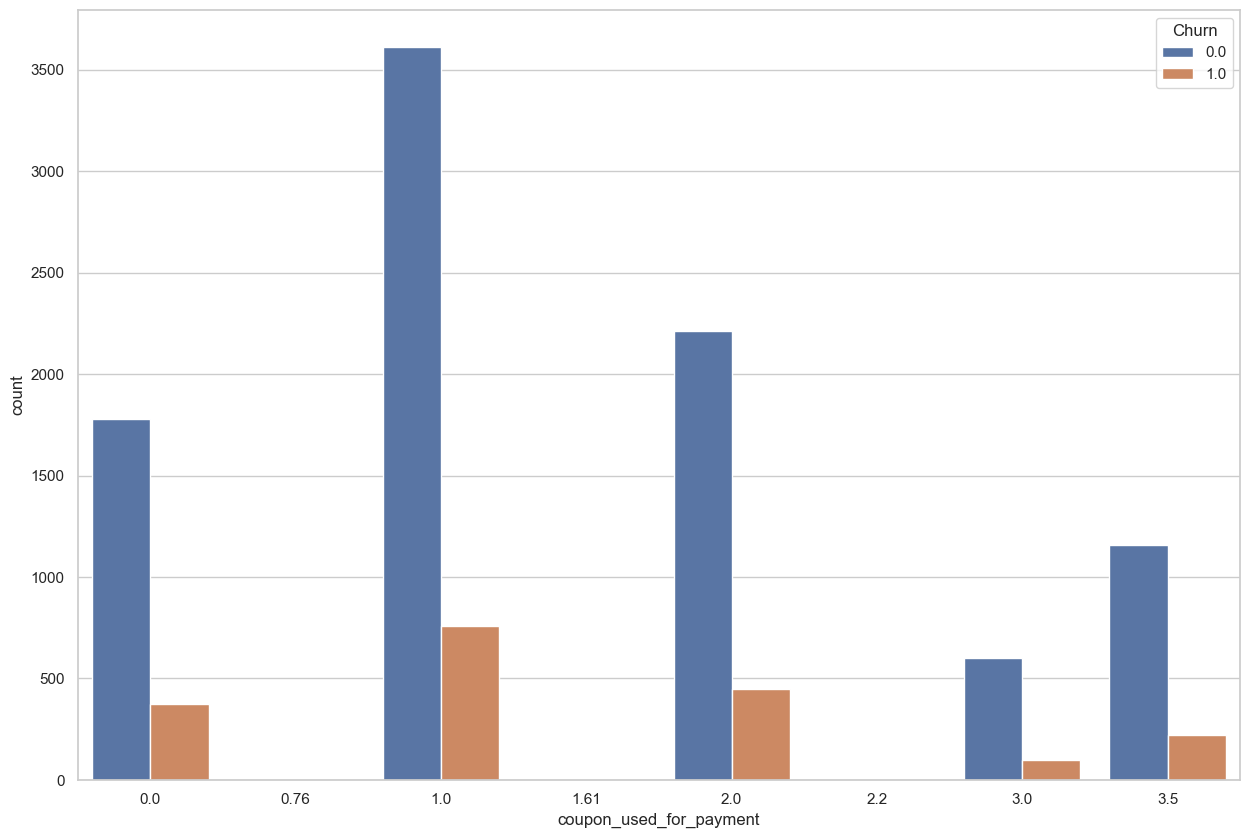

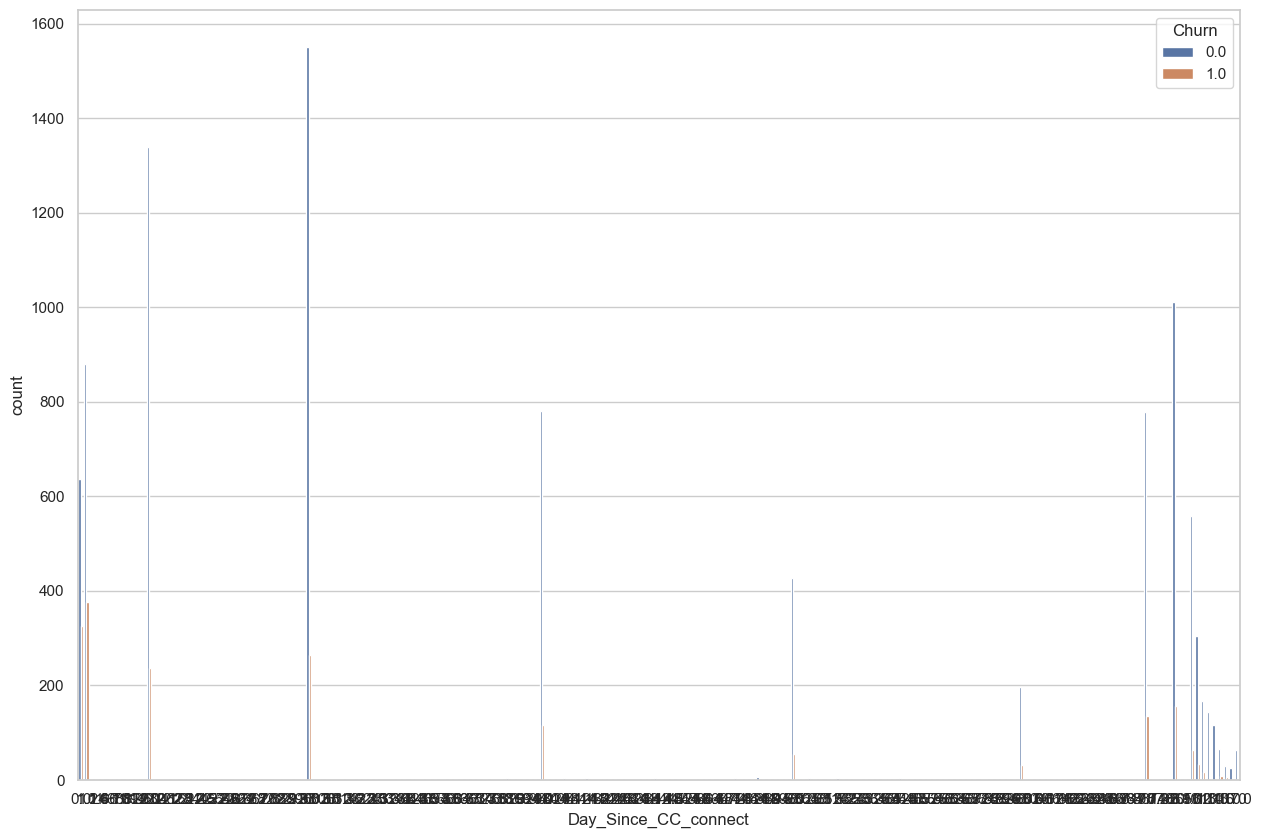

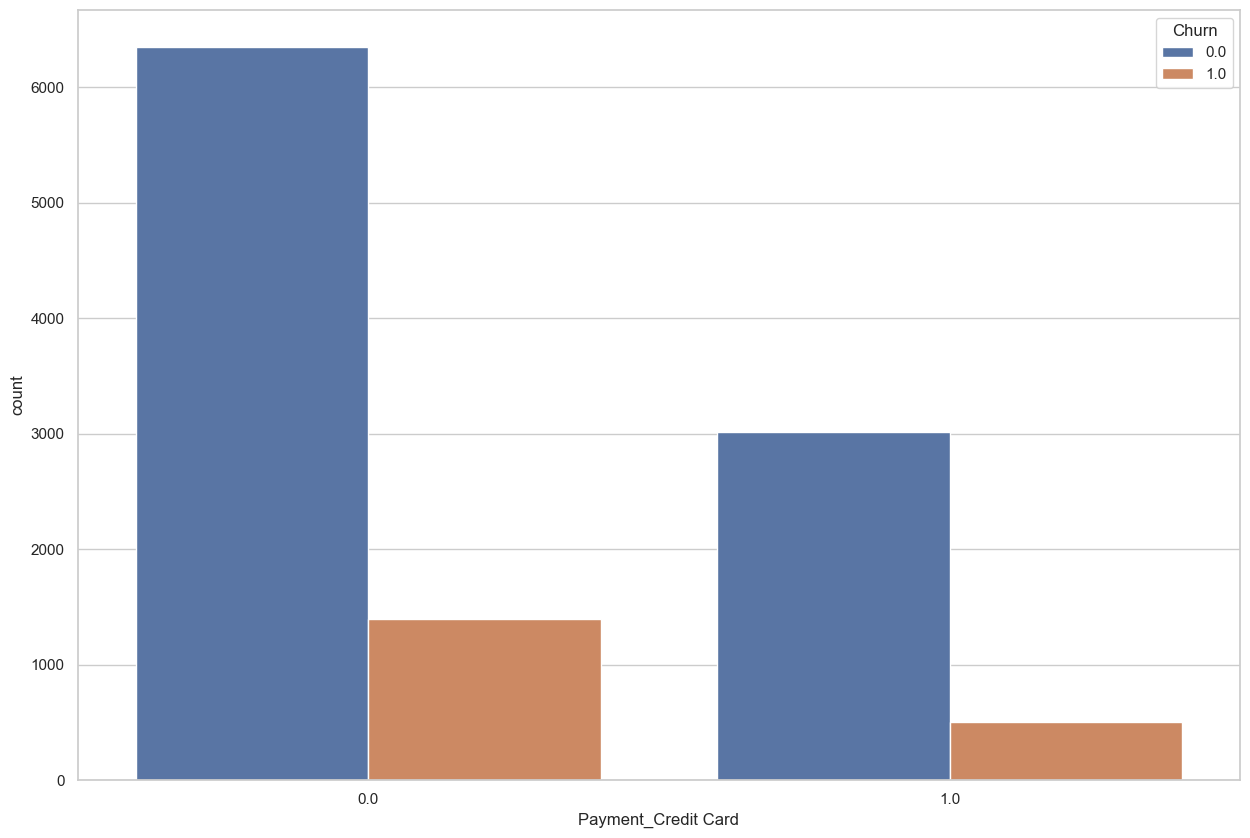

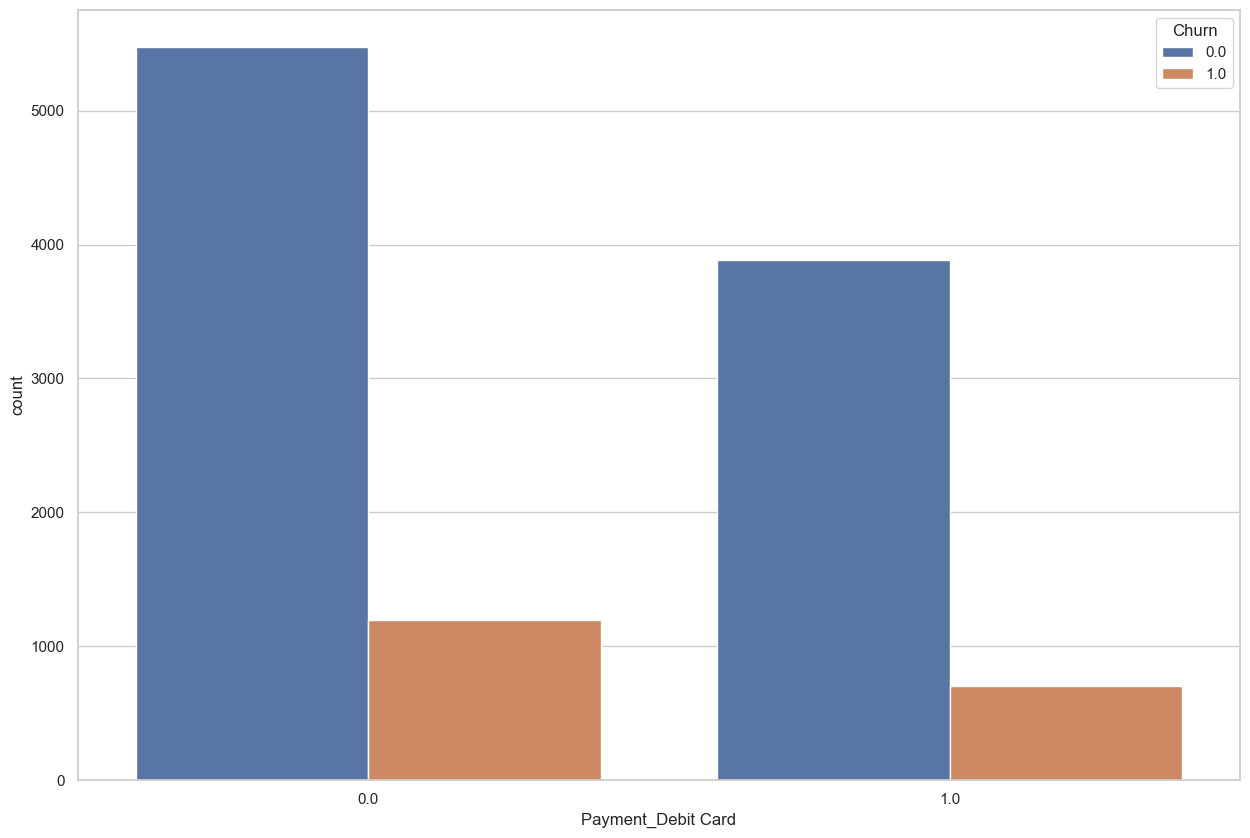

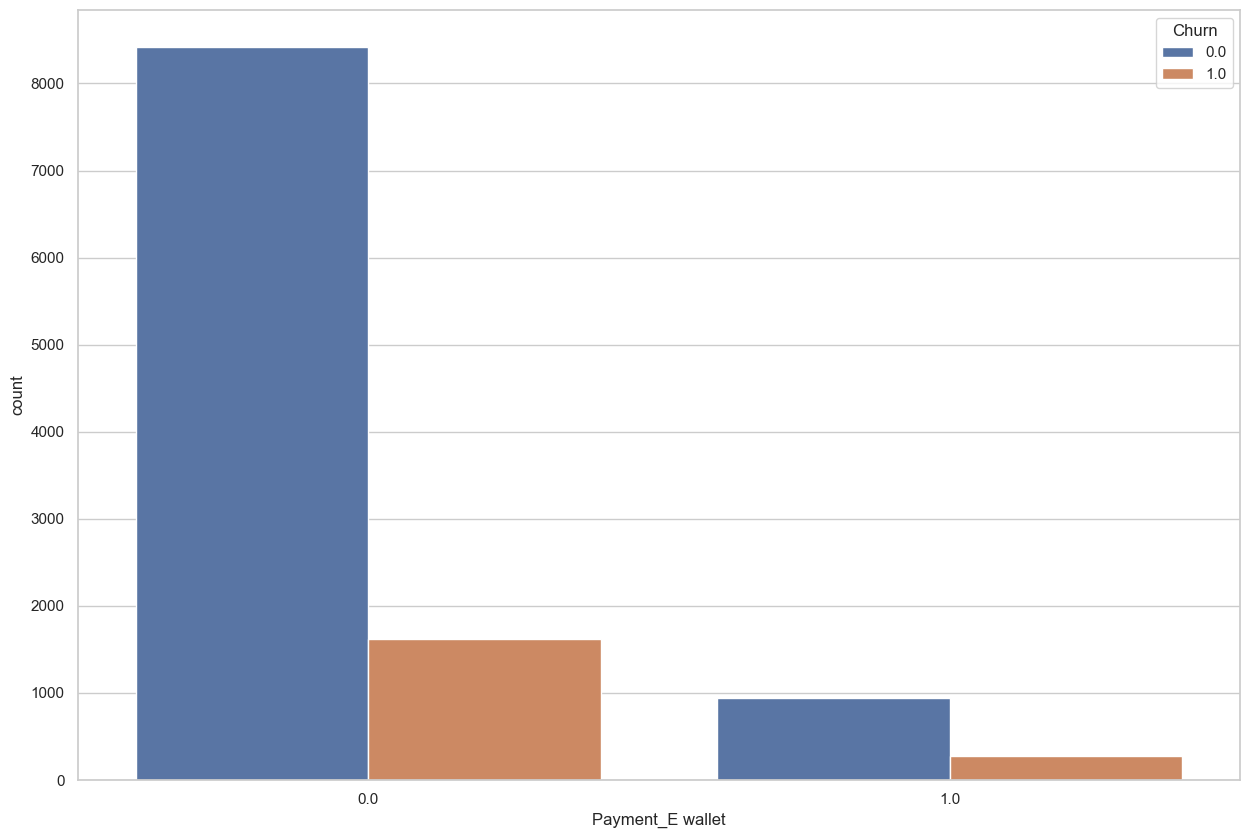

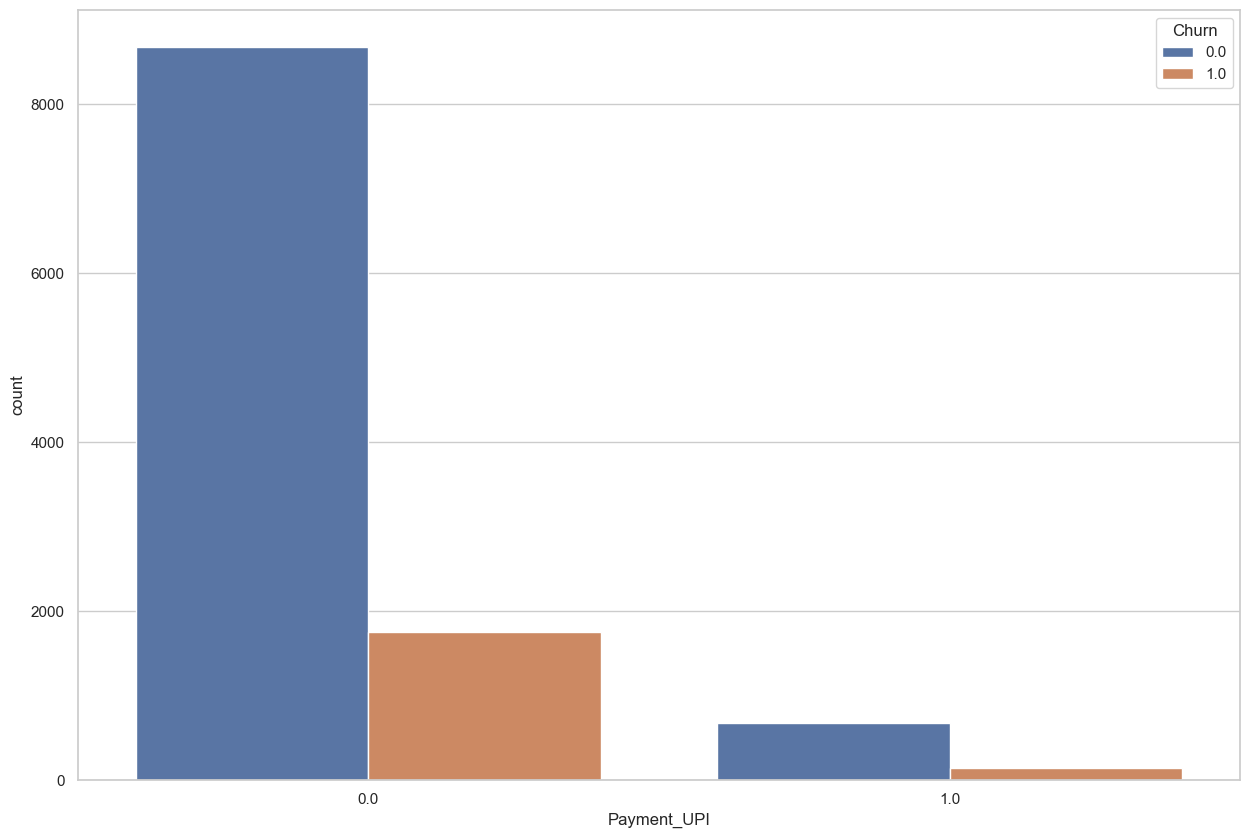

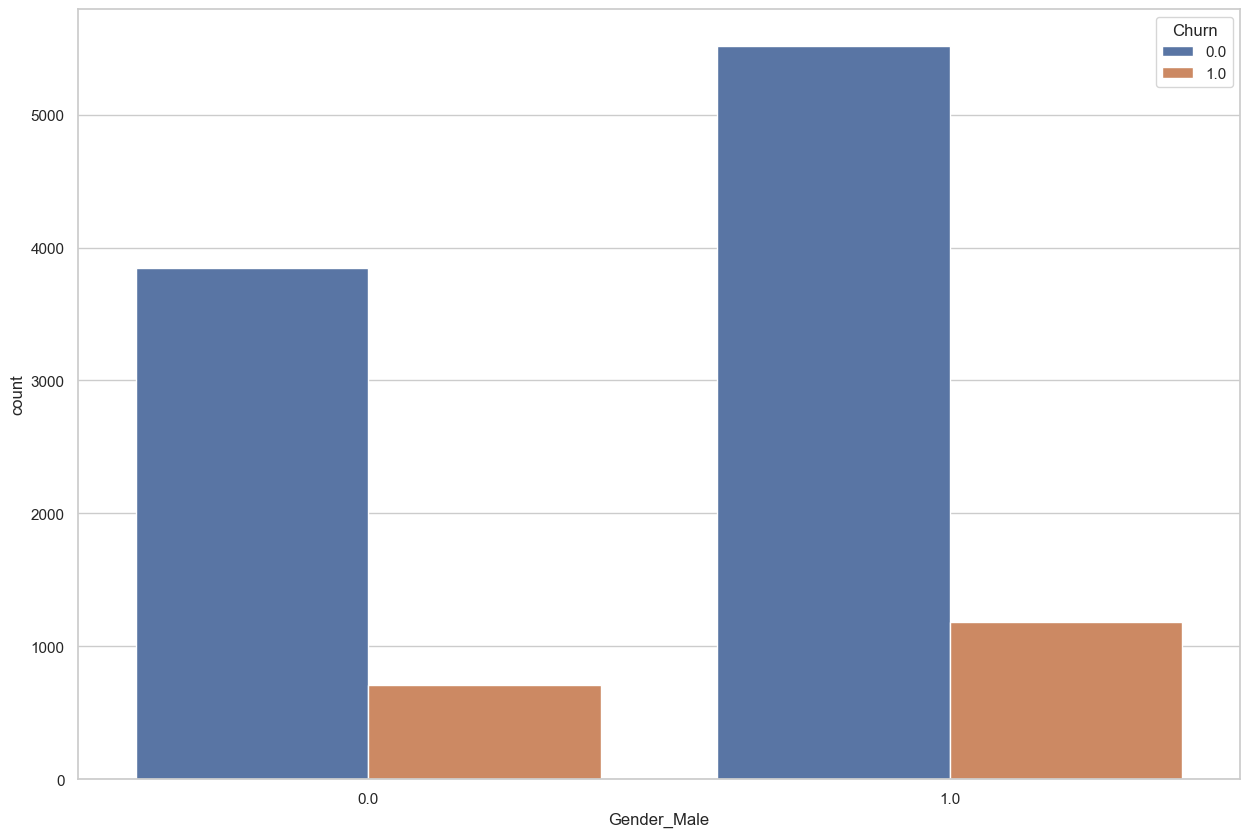

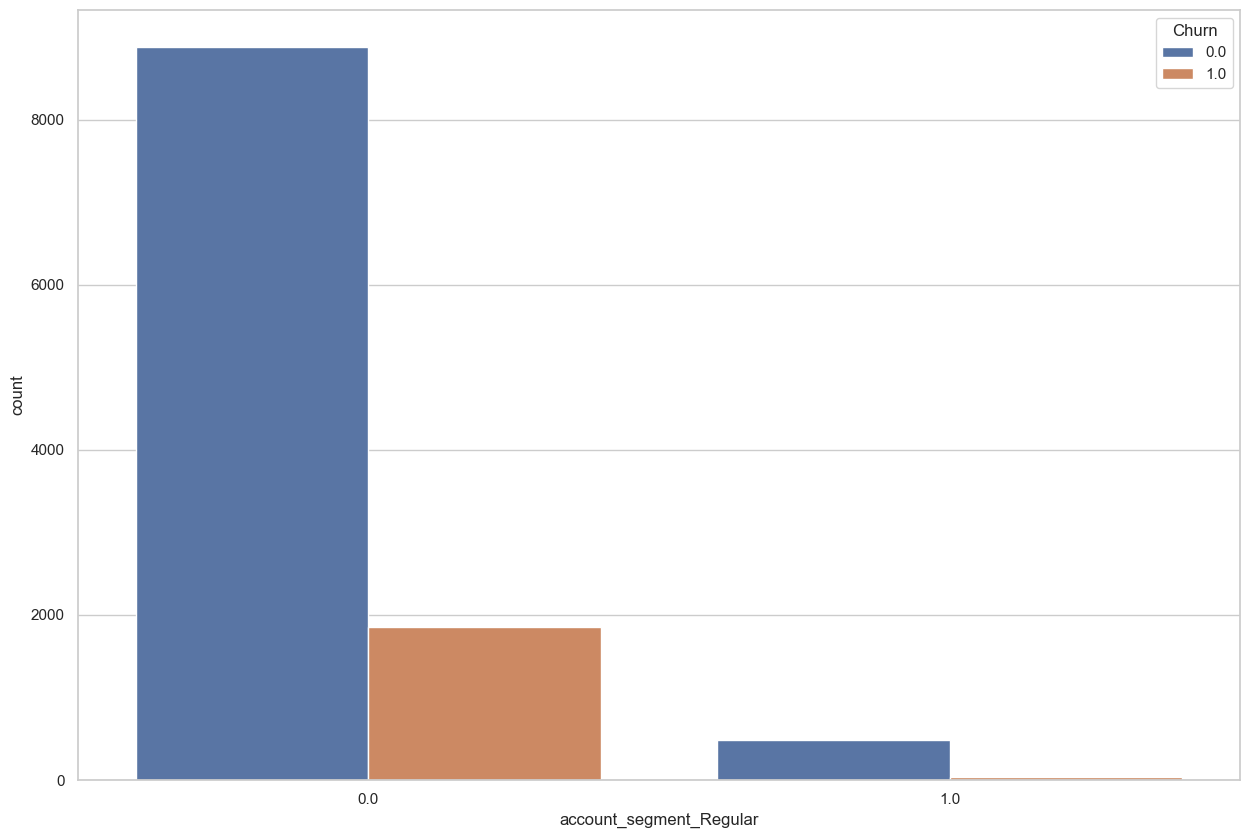

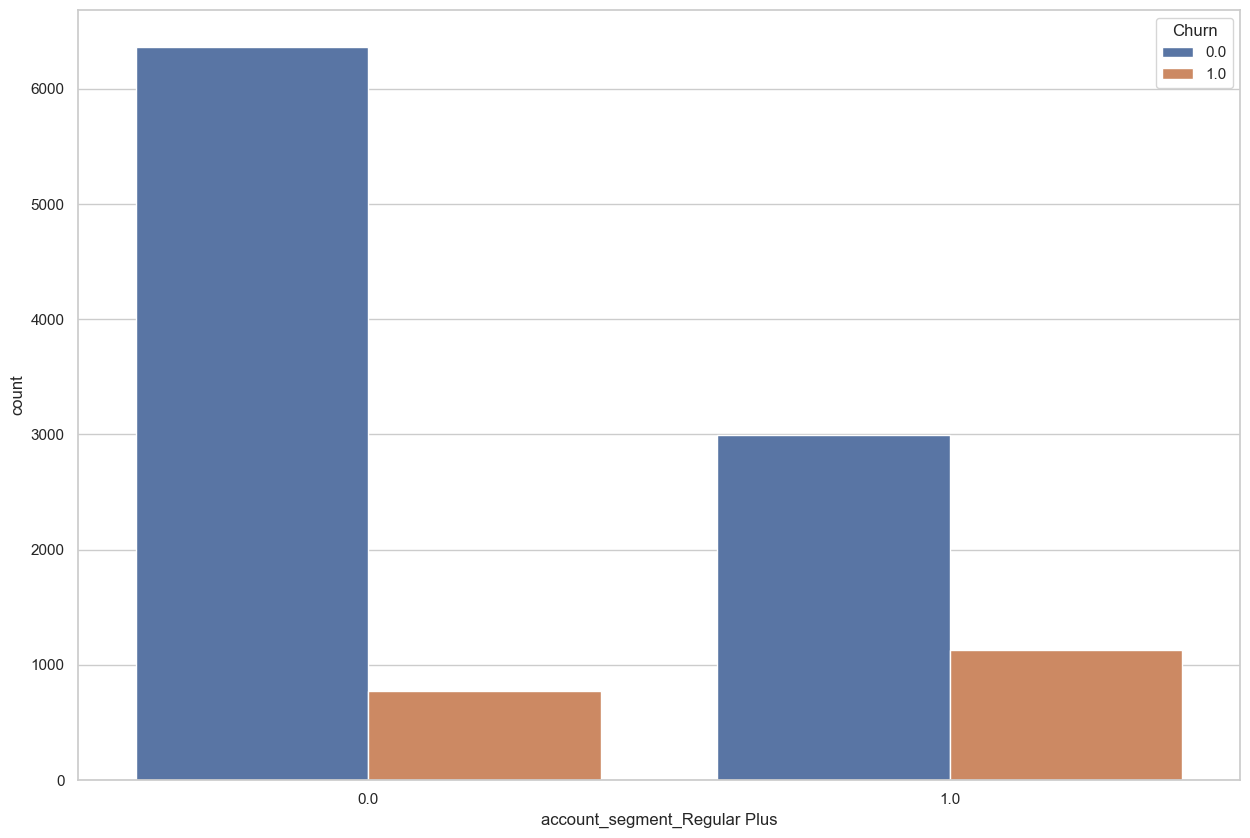

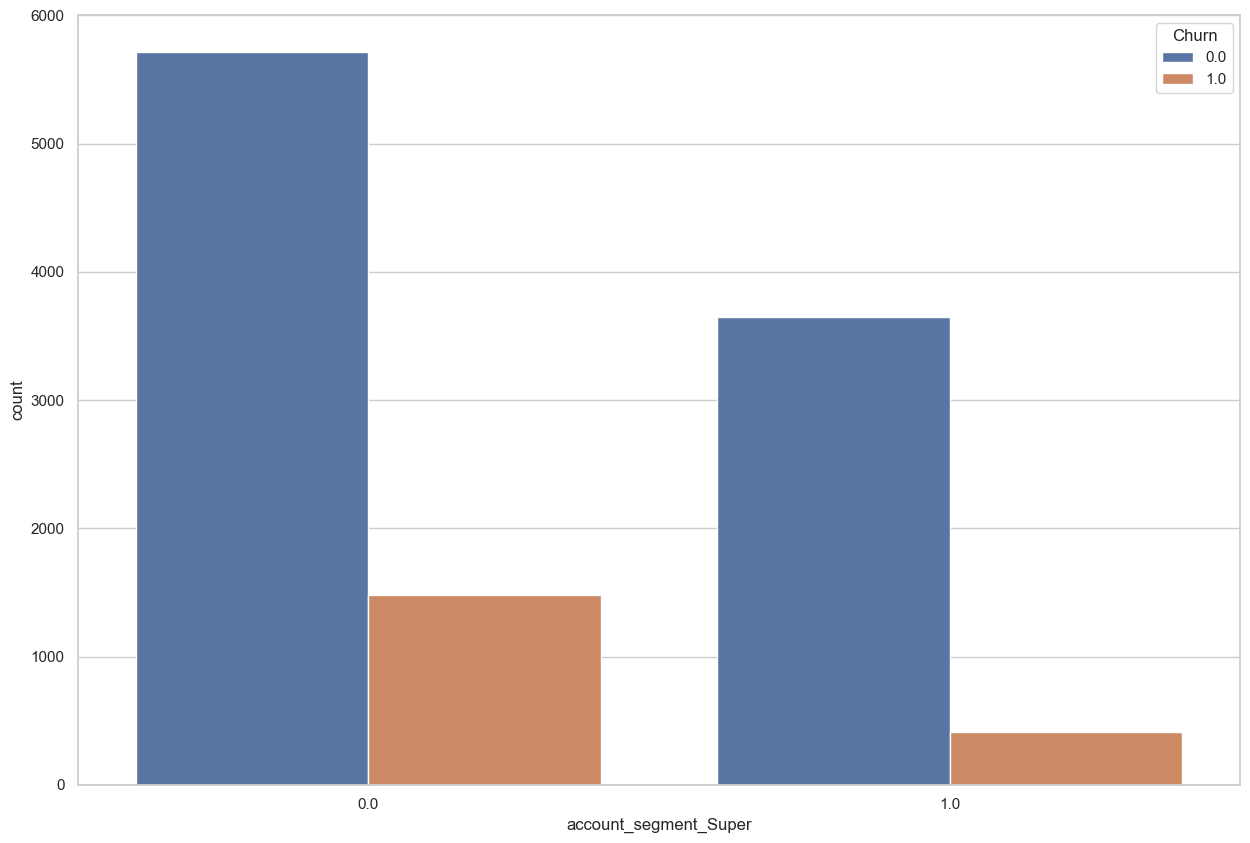

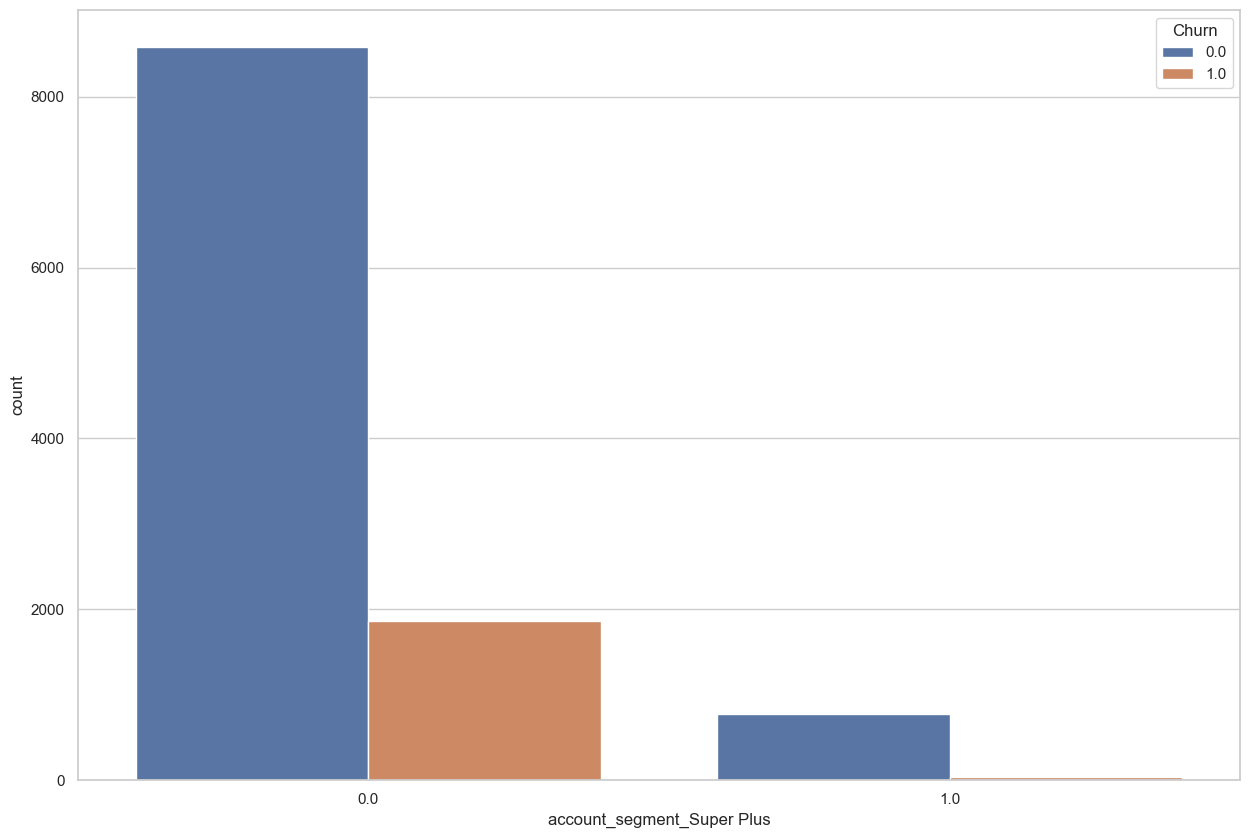

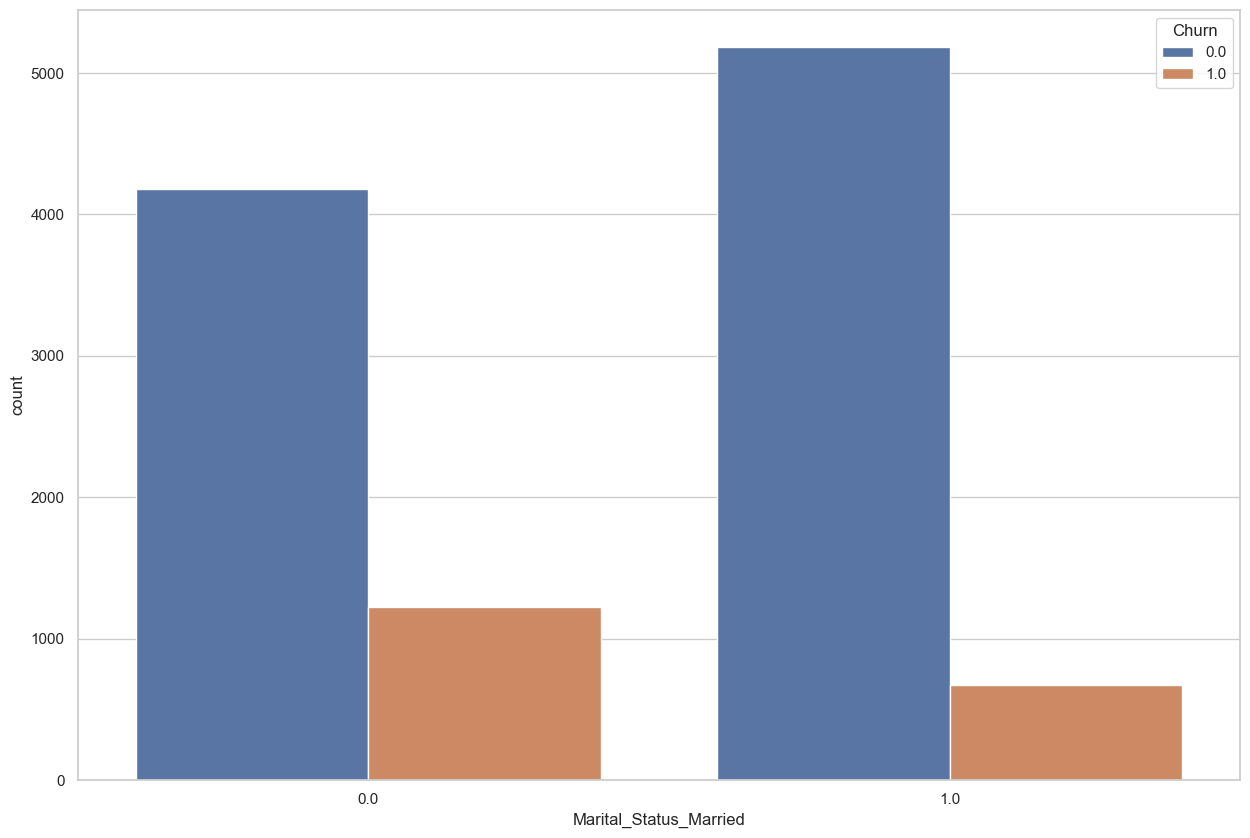

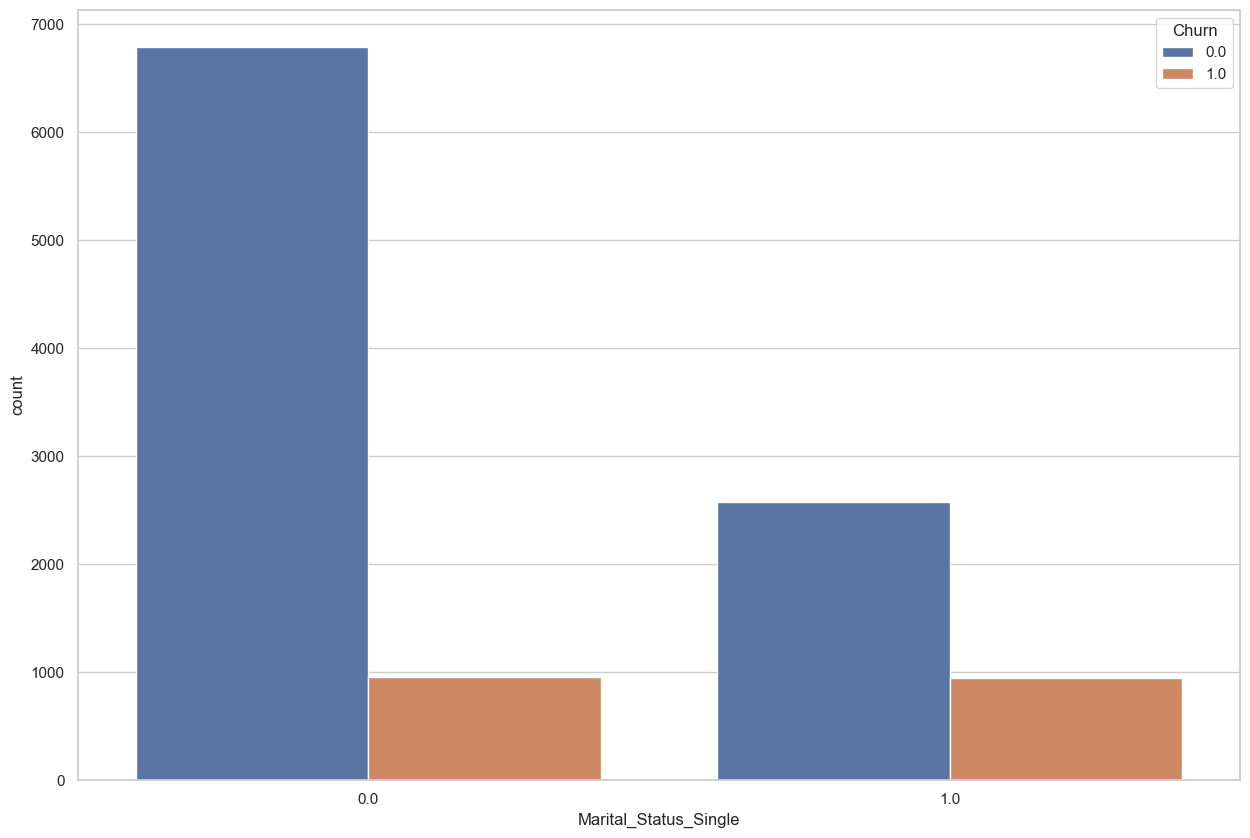

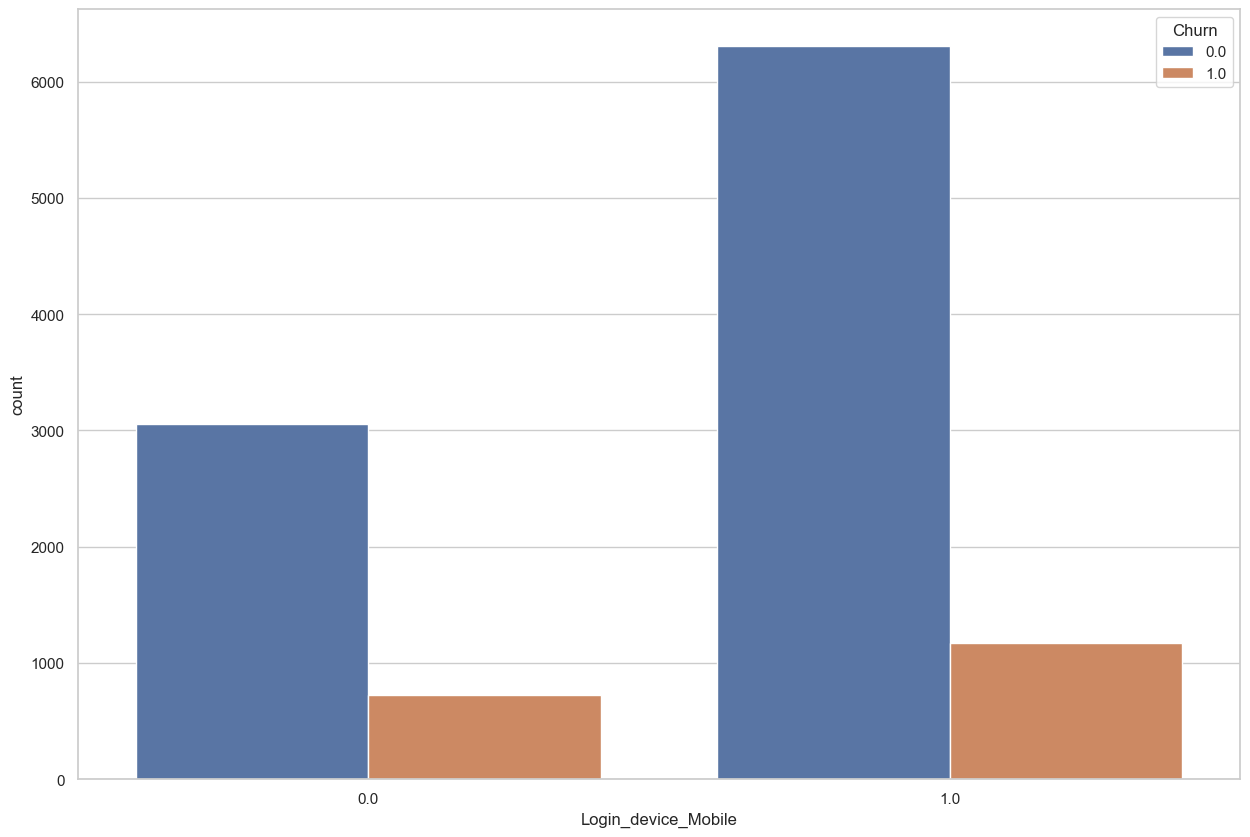

In [60]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'Tenure', 'cashback','CC_Contacted_LY'])):
    plt.figure(i)
    plt.figure(figsize = (15,10))
    sns.countplot(data=df, x=predictor, hue='Churn')

In [63]:
df['CC_Contacted_LY'] = df['CC_Contacted_LY'].astype(object)

In [64]:
df['CC_Contacted_LY'].dtype

dtype('O')